<a href="https://colab.research.google.com/github/MartaGacek1/MonteCarloProject1/blob/main/MonteCarloProjekt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt I - Wprowadzenie do symulacji i metod Monte Carlo

## Marta Gacek

## 1. Generatory liczb pseudolosowych

### 1.1 LCG ("Linear Congruential Generator")



In [1]:
import time

# x0 - warunek początkowy
# M - wartość modulo
# a, c - parametry z rekurencyjnego wzoru
# n - ilość liczb pseudolosowych, które otrzymamy

def LCG(x0, a, c, M, n):
    result = []
    x = x0 % M
    result.append(x)
    for i in range(n-1):
        x = (a * x + c) % M
        result.append(x)
    return [j/M for j in result]

start_time = time.time()
test_lcg = LCG(30, 1, 5, 13, 2**15)
end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")
#print(test_lcg)

Czas wykonania: 0.037934 sekund


### 1.2 GLCG ("Generalized Linear Congruential Generator")

In [2]:
# liczba współczynników musi być równa k, czyli liczbie wartości początkowych x_i dla i=0,...,k-1
# initials - lista k warunków początkowych
# coeffs - współczynniki a_i dla i=0,...,k-1
# M - wartość modulo
# n - ilość liczb pseudolosowych, które otrzymamy

def GLCG(initials, coeffs, M, n):
    k = len(initials)
    if len(coeffs) != k:
        raise ValueError("The number of coefficients doesn't match the number of initial values.")
    lst = initials[:] # lista "robocza"
    result = lst[:] # tutaj będą ostatecznie zwracane liczby
    result = [i/M for i in result] # normalizacja
    for i in range(n - k): # bo pierwsze k z n liczb już mamy na początku
        x = sum(coeffs[j] * lst[-(j + 1)] for j in range(k)) % M
        result.append(x/M) # normalizacja
        lst.append(x)
        lst.pop(0)  # potrzebujemy k ostatnich wartości do wyznaczania następnych x
    return result

start_time = time.time()
test_glcg = GLCG([30, 40, 50], [3, 7, 68], 2**10, 2**15)
end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")
#print(test_glcg)

Czas wykonania: 0.293578 sekund


### 1.3 RC4

In [3]:
# K - "klucz" - liczby z przedziału {0,...,m-1}, w naszym przypadku m=32
# n - ilość liczb pseudolosowych, które otrzymamy
# S - permutacja zbioru m-elementowego
# m - wartość modulo

import matplotlib.pyplot as plt
import random as rd
import numpy as np

def KSA(K, m=32):
   S = list(range(m))
   j = 0
   for i in range(m):
       j = (j + S[i] + K[i % len(K)]) % m
       S[i], S[j] = S[j], S[i]
   return S

def PRGA(S, n, m=32):
   i = 0
   j = 0
   result = []
   for k in range(n):
       i = (i + 1) % m
       j = (j + S[i]) % m
       S[i], S[j] = S[j], S[i]
       Y = S[(S[i] + S[j]) % m]
       result.append(Y/m) # normalizacja
   return result

def RC4(K, n, m=32):
  s = KSA(K, m)
  return PRGA(s, n, m)


k1 = [x for x in range(100)]
start_time = time.time()
test_rc4 = RC4(k1, 2**15)
end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")
#print(test_rc4)

Czas wykonania: 0.018843 sekund


### 1.4 Xorshift

In [4]:
# x0 - niezerowy warunek początkowy
# a, b, c - parametry określające przesunięcia bitowe
# n - ilość liczb pseudolosowych, które otrzymamy

def xorshift(x0, n, a=21, b=35, c=4):
    if x0 == 0:
        raise ValueError("Initial value must not be zero.")
    x = x0
    result = []
    for i in range(n):
        x ^= (x >> a)  # przesunięcie w prawo i operacja xor
        x ^= (x << b)  # przesunięcie w lewo i operacja xor
        x ^= (x >> c)  # przesunięcie w prawo i operacja xor
        result.append(x & 0xFFFFFFFF)  # ograniczenie liczby x do zakresu 32-bitowego
    result = [i/(2**32 - 1) for i in result] # normalizacja (dzielimy przez największą możliwą wartość wygenerowaną przez xorshift)
    return result

start_time = time.time()
test_xorshift = xorshift(20, n=2**15)
end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")
#print(test_xorshift)

Czas wykonania: 4.792888 sekund


# 2. Testy statystyczne

## 2.1 Test $\chi^2$

In [5]:
from scipy.stats import chisquare

# wyniki dla n = 2^15

start_time = time.time()

# LCG

binss=20

def p_val_test(p):
  if p>=0.05:
    print("Hipoteza zerowa nieodrzucona.")
  else:
    print("Hipoteza zerowa odrzucona.")

obs1, edges = np.histogram(test_lcg, bins=binss)
expt1 = np.full(binss, len(test_lcg) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla LCG:", st1)
print("P-wartość dla LCG:", p1)
print(p_val_test(p1))

# GLCG

obs2, edges = np.histogram(test_glcg, bins=binss)
expt2 = np.full(binss, len(test_glcg) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla GLCG:", st2)
print("P-wartość dla GLCG:", p2)
print(p_val_test(p2))

# RC4

obs3, edges = np.histogram(test_rc4, bins=binss)
expt3 = np.full(binss, len(test_rc4) / binss)
st3, p3 = chisquare(f_obs=obs3, f_exp=expt3)
print("Statystyka chi-kwadrat dla RC4:", st3)
print("P-wartość dla RC4:", p3)
print(p_val_test(p3))

# Xorshift

obs4, edges = np.histogram(test_xorshift, bins=binss)
expt4 = np.full(binss, len(test_xorshift) / binss)
st4, p4 = chisquare(f_obs=obs4, f_exp=expt4)
print("Statystyka chi-kwadrat dla Xorshift:", st4)
print("P-wartość dla Xorshift:", p4)
print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")


Statystyka chi-kwadrat dla LCG: 17644.309570312504
P-wartość dla LCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla GLCG: 5505.256835937498
P-wartość dla GLCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla RC4: 3149.357177734375
P-wartość dla RC4: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla Xorshift: 17.54443359375
P-wartość dla Xorshift: 0.5530346658651297
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.025707 sekund


In [6]:
# wyniki dla n = 2^10

start_time = time.time()

test_lcg1=LCG(30, 1, 5, 13, 2**10)
test_glcg1=GLCG([30, 40, 50], [3, 7, 68], 2**10, 2**10)
test_rc4_1 = RC4(k1, 2**10)
test_xorshift1 = xorshift(20, n=2**10)

# LCG

binss=20

obs1, edges = np.histogram(test_lcg1, bins=binss)
expt1 = np.full(binss, len(test_lcg1) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla LCG:", st1)
print("P-wartość dla LCG:", p1)
print(p_val_test(p1))

# GLCG

obs2, edges = np.histogram(test_glcg1, bins=binss)
expt2 = np.full(binss, len(test_glcg1) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla GLCG:", st2)
print("P-wartość dla GLCG:", p2)
print(p_val_test(p2))

# RC4

obs3, edges = np.histogram(test_rc4_1, bins=binss)
expt3 = np.full(binss, len(test_rc4_1) / binss)
st3, p3 = chisquare(f_obs=obs3, f_exp=expt3)
print("Statystyka chi-kwadrat dla RC4:", st3)
print("P-wartość dla RC4:", p3)
print(p_val_test(p3))

# Xorshift

obs4, edges = np.histogram(test_xorshift1, bins=binss)
expt4 = np.full(binss, len(test_xorshift1) / binss)
st4, p4 = chisquare(f_obs=obs4, f_exp=expt4)
print("Statystyka chi-kwadrat dla Xorshift:", st4)
print("P-wartość dla Xorshift:", p4)
print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")


Statystyka chi-kwadrat dla LCG: 551.4296875000001
P-wartość dla LCG: 8.69783778595415e-105
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla GLCG: 171.23437499999994
P-wartość dla GLCG: 1.62888195715364e-26
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla RC4: 122.2109375
P-wartość dla RC4: 4.2763370025242595e-17
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla Xorshift: 11.742187500000004
P-wartość dla Xorshift: 0.8963475736552577
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.031245 sekund


In [7]:
# wyniki dla n = 2^20
# z wyjątkiem Xorshift, bo dla większych rozmiarów n wykonuje się on bardzo wolno (dla 2^20 ponad 1h 20 min)

start_time = time.time()

test_lcg2=LCG(30, 1, 5, 13, 2**20)
test_glcg2=GLCG([30, 40, 50], [3, 7, 68], 2**10, 2**20)
test_rc4_2 = RC4(k1, 2**20)
#test_xorshift2 = xorshift(20, n=2**20)

# LCG

binss=20

obs1, edges = np.histogram(test_lcg2, bins=binss)
expt1 = np.full(binss, len(test_lcg2) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla LCG:", st1)
print("P-wartość dla LCG:", p1)
print(p_val_test(p1))

# GLCG

obs2, edges = np.histogram(test_glcg2, bins=binss)
expt2 = np.full(binss, len(test_glcg2) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla GLCG:", st2)
print("P-wartość dla GLCG:", p2)
print(p_val_test(p2))

# RC4

obs3, edges = np.histogram(test_rc4_2, bins=binss)
expt3 = np.full(binss, len(test_rc4_2) / binss)
st3, p3 = chisquare(f_obs=obs3, f_exp=expt3)
print("Statystyka chi-kwadrat dla RC4:", st3)
print("P-wartość dla RC4:", p3)
print(p_val_test(p3))

# Xorshift

# obs4, edges = np.histogram(test_xorshift, bins=binss)
# expt4 = np.full(binss, len(test_xorshift) / binss)
# st4, p4 = chisquare(f_obs=obs4, f_exp=expt4)
# print("Statystyka chi-kwadrat dla Xorshift:", st4)
# print("P-wartość dla Xorshift:", p4)
# print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka chi-kwadrat dla LCG: 564617.8462066652
P-wartość dla LCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla GLCG: 176239.7649993896
P-wartość dla GLCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla RC4: 98795.03034973145
P-wartość dla RC4: 0.0
Hipoteza zerowa odrzucona.
None
Czas wykonania: 2.246122 sekund


## 2.2 Test Kołmogorowa-Smirnowa

In [8]:
from scipy.stats import ks_1samp, uniform

# wyniki dla n = 2^15

start_time = time.time()

# LCG

st1, p1 = ks_1samp(test_lcg, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla LCG:", st1)
print("P-wartość dla LCG:", p1)
print(p_val_test(p1))

# GLCG

st2, p2 = ks_1samp(test_glcg, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla GLCG:", st2)
print("P-wartość dla GLCG:", p2)
print(p_val_test(p2))

# RC4
#dziwne wyniki bo dystrybuanta schodkowa

st3, p3 = ks_1samp(test_rc4, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla RC4:", st3)
print("P-wartość dla RC4:", p3)
print(p_val_test(p3))

# Xorshift

st4, p4 = ks_1samp(test_xorshift, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla Xorshift:", st4)
print("P-wartość dla Xorshift:", p4)
print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka Kołmogorowa-Smirnowa dla LCG: 0.07695124699519229
P-wartość dla LCG: 3.313269529534475e-169
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla GLCG: 0.073516845703125
P-wartość dla GLCG: 1.8473544790399517e-154
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla RC4: 0.033294677734375
P-wartość dla RC4: 5.404678627545136e-32
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla Xorshift: 0.005506766648966599
P-wartość dla Xorshift: 0.2724178392024802
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.153689 sekund


In [9]:
# wyniki dla n = 2^10

start_time = time.time()

# LCG

st1, p1 = ks_1samp(test_lcg1, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla LCG:", st1)
print("P-wartość dla LCG:", p1)
print(p_val_test(p1))

# GLCG

st2, p2 = ks_1samp(test_glcg1, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla GLCG:", st2)
print("P-wartość dla GLCG:", p2)
print(p_val_test(p2))

# RC4
#dziwne wyniki bo dystrybuanta schodkowa

st3, p3 = ks_1samp(test_rc4_1, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla RC4:", st3)
print("P-wartość dla RC4:", p3)
print(p_val_test(p3))

# Xorshift

st4, p4 = ks_1samp(test_xorshift1, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla Xorshift:", st4)
print("P-wartość dla Xorshift:", p4)
print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka Kołmogorowa-Smirnowa dla LCG: 0.07767427884615385
P-wartość dla LCG: 8.058011247917728e-06
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla GLCG: 0.0712890625
P-wartość dla GLCG: 5.7016213355827625e-05
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla RC4: 0.044921875
P-wartość dla RC4: 0.031098686325928604
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla Xorshift: 0.02057039097327651
P-wartość dla Xorshift: 0.7710172549602066
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.020023 sekund


In [10]:
# wyniki dla n = 2^20
# z wyjątkiem Xorshift

start_time = time.time()

# LCG

st1, p1 = ks_1samp(test_lcg2, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla LCG:", st1)
print("P-wartość dla LCG:", p1)
print(p_val_test(p1))

# GLCG

st2, p2 = ks_1samp(test_glcg2, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla GLCG:", st2)
print("P-wartość dla GLCG:", p2)
print(p_val_test(p2))

# RC4
#dziwne wyniki bo dystrybuanta schodkowa

st3, p3 = ks_1samp(test_rc4_2, uniform.cdf)
print("Statystyka Kołmogorowa-Smirnowa dla RC4:", st3)
print("P-wartość dla RC4:", p3)
print(p_val_test(p3))

# Xorshift

# st4, p4 = ks_1samp(test_xorshift, uniform.cdf)
# print("Statystyka Kołmogorowa-Smirnowa dla Xorshift:", st4)
# print("P-wartość dla Xorshift:", p4)
# print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka Kołmogorowa-Smirnowa dla LCG: 0.0769241773165189
P-wartość dla LCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla GLCG: 0.07356548309326172
P-wartość dla GLCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka Kołmogorowa-Smirnowa dla RC4: 0.03149986267089844
P-wartość dla RC4: 0.0
Hipoteza zerowa odrzucona.
None
Czas wykonania: 0.673624 sekund


## 2.3 Test serii

In [11]:
import numpy as np
from scipy.stats import norm

def runs_test(data):
    median = np.median(data)
    binary = [1 if i >= median else 0 for i in data]  # zamiana danych na ciąg binarny (według mediany)
    x = np.sum(binary)  # Liczba 1 (liczenie elementów)
    y = len(binary) - x  # Liczba 0
    n = x + y
    if x == 0 or y == 0:
        raise ValueError("Not enough diversity of data. We cannot perform this test.")
    runs = 1  # liczba serii
    for i in range(1, len(binary)):
        if binary[i] != binary[i - 1]:
            runs += 1
    expected = (2 * x * y) / n + 1  # wartość oczekiwana liczby serii
    sigma = np.sqrt((2 * x * y * (2 * x * y - n)) / (n**2 * (n - 1)))  # odchylenie standardowe
    z = (runs - expected) / sigma
    p_value = 2 * (1 - norm.cdf(abs(z)))
    return {
        "Statystyka Z": z,
        "P-wartość": p_value,
        "Liczba serii": runs,
        "Mediana": median
    }

In [12]:
# wyniki dla n = 2^15

start_time = time.time()

# LCG

lcg_data = runs_test(test_lcg)
print("Statystyka testu serii dla LCG:", lcg_data["Statystyka Z"])
print("P-wartość dla LCG:", lcg_data["P-wartość"])
print(p_val_test(lcg_data["P-wartość"]))

# GLCG

glcg_data = runs_test(test_glcg)
print("Statystyka testu serii dla GLCG:", glcg_data["Statystyka Z"])
print("P-wartość dla GLCG:", glcg_data["P-wartość"])
print(p_val_test(glcg_data["P-wartość"]))

# RC4

rc4_data = runs_test(test_rc4)
print("Statystyka testu serii dla RC4:", rc4_data["Statystyka Z"])
print("P-wartość dla RC4:", rc4_data["P-wartość"])
print(p_val_test(rc4_data["P-wartość"]))

# Xorshift

xorshift_data = runs_test(test_xorshift)
print("Statystyka testu serii dla Xorshift:", xorshift_data["Statystyka Z"])
print("P-wartość dla Xorshift:", xorshift_data["P-wartość"])
print(p_val_test(xorshift_data["P-wartość"]))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka testu serii dla LCG: 99.12864298977301
P-wartość dla LCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka testu serii dla GLCG: -7.502074837193712
P-wartość dla GLCG: 6.283862319378386e-14
Hipoteza zerowa odrzucona.
None
Statystyka testu serii dla RC4: 1.1924843866469046
P-wartość dla RC4: 0.23307136924221683
Hipoteza zerowa nieodrzucona.
None
Statystyka testu serii dla Xorshift: 0.7955072677755272
P-wartość dla Xorshift: 0.42631848500068603
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.061090 sekund


In [13]:
# wyniki dla n = 2^10

start_time = time.time()

# LCG

lcg_data = runs_test(test_lcg1)
print("Statystyka testu serii dla LCG:", lcg_data["Statystyka Z"])
print("P-wartość dla LCG:", lcg_data["P-wartość"])
print(p_val_test(lcg_data["P-wartość"]))

# GLCG

glcg_data = runs_test(test_glcg1)
print("Statystyka testu serii dla GLCG:", glcg_data["Statystyka Z"])
print("P-wartość dla GLCG:", glcg_data["P-wartość"])
print(p_val_test(glcg_data["P-wartość"]))

# RC4

rc4_data = runs_test(test_rc4_1)
print("Statystyka testu serii dla RC4:", rc4_data["Statystyka Z"])
print("P-wartość dla RC4:", rc4_data["P-wartość"])
print(p_val_test(rc4_data["P-wartość"]))

# Xorshift

xorshift_data = runs_test(test_xorshift1)
print("Statystyka testu serii dla Xorshift:", xorshift_data["Statystyka Z"])
print("P-wartość dla Xorshift:", xorshift_data["P-wartość"])
print(p_val_test(xorshift_data["P-wartość"]))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka testu serii dla LCG: 17.48320598046148
P-wartość dla LCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka testu serii dla GLCG: -1.4380864671490048
P-wartość dla GLCG: 0.15040952188240908
Hipoteza zerowa nieodrzucona.
None
Statystyka testu serii dla RC4: -0.7484584845520809
P-wartość dla RC4: 0.45418365728769405
Hipoteza zerowa nieodrzucona.
None
Statystyka testu serii dla Xorshift: 0.43771398876310097
P-wartość dla Xorshift: 0.6615936276613448
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.028450 sekund


In [14]:
# wyniki dla n = 2^20

start_time = time.time()

# LCG

lcg_data = runs_test(test_lcg2)
print("Statystyka testu serii dla LCG:", lcg_data["Statystyka Z"])
print("P-wartość dla LCG:", lcg_data["P-wartość"])
print(p_val_test(lcg_data["P-wartość"]))

# GLCG

glcg_data = runs_test(test_glcg2)
print("Statystyka testu serii dla GLCG:", glcg_data["Statystyka Z"])
print("P-wartość dla GLCG:", glcg_data["P-wartość"])
print(p_val_test(glcg_data["P-wartość"]))

# RC4

rc4_data = runs_test(test_rc4_2)
print("Statystyka testu serii dla RC4:", rc4_data["Statystyka Z"])
print("P-wartość dla RC4:", rc4_data["P-wartość"])
print(p_val_test(rc4_data["P-wartość"]))

# Xorshift

# xorshift_data = runs_test(test_xorshift)
# print("Statystyka testu serii dla Xorshift:", xorshift_data["Statystyka Z"])
# print("P-wartość dla Xorshift:", xorshift_data["P-wartość"])
# print(p_val_test(xorshift_data["P-wartość"]))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

<ipython-input-11-1137840c573d>:17: RuntimeWarning: overflow encountered in scalar multiply
  sigma = np.sqrt((2 * x * y * (2 * x * y - n)) / (n**2 * (n - 1)))  # odchylenie standardowe
<ipython-input-11-1137840c573d>:17: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt((2 * x * y * (2 * x * y - n)) / (n**2 * (n - 1)))  # odchylenie standardowe


Statystyka testu serii dla LCG: nan
P-wartość dla LCG: nan
Hipoteza zerowa odrzucona.
None
Statystyka testu serii dla GLCG: nan
P-wartość dla GLCG: nan
Hipoteza zerowa odrzucona.
None
Statystyka testu serii dla RC4: nan
P-wartość dla RC4: nan
Hipoteza zerowa odrzucona.
None
Czas wykonania: 1.149243 sekund


# 3. Second-level testing

In [15]:
import matplotlib.pyplot as plt
import time

#wnioski: czy przechodzą testy 1 i 2 rodzaju

start_time = time.time()

sec_test_lcg = LCG(30, 1, 5, 13, 1000*2**15)

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Czas wykonania: 8.785014 sekund


In [16]:
start_time = time.time()

sec_test_glcg = GLCG([30, 40, 50], [3, 7, 68], 2**10, 1000*2**15)

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Czas wykonania: 46.774329 sekund


In [17]:
start_time = time.time()

sec_test_rc4 = RC4(k1, 1000*2**15)

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Czas wykonania: 15.316153 sekund


In [18]:
start_time = time.time()

sec_test_xorshift = xorshift(20, n=2**18)

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Czas wykonania: 371.001823 sekund


## 3.1 Test $\chi^2$

LCG:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
GLCG:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
RC4:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
Xorshift:
Hipotezę odrzucono 10 razy. Hipotezy nie odrzucono 246 razy.
None
Czas wykonania: 11.667616 sekund


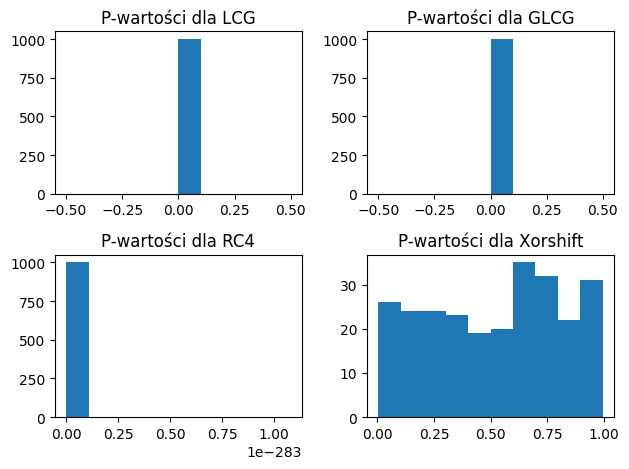

In [43]:
start_time = time.time()

def second_level_testing_chi_square(data, sequence_length):
    seq_num = len(data) // sequence_length  # ilość podciągów podanej długości
    p_values = []
    for i in range(seq_num):
        seq = data[i * sequence_length : (i + 1) * sequence_length]  # tworzenie podciągów
        try:
            obs, edges = np.histogram(seq, bins = 30)
            expt = np.full(30, len(seq) / 30)
            p_value = chisquare(f_obs=obs, f_exp=expt)[1]  # przeprowadzanie testu
            p_values.append(p_value)
        except ValueError:
            p_values.append(None)
    return p_values


def sec_level_test_p_val(p_values):
  p_values_results = 0
  for p in p_values:
        if p < 0.05:
          p_values_results += 1
  print(f"Hipotezę odrzucono {p_values_results} razy. Hipotezy nie odrzucono {len(p_values) - p_values_results} razy.")


length1 = 2**15
length2 = 2**10
p_values1_lcg = second_level_testing_chi_square(sec_test_lcg, length1)
p_values1_glcg = second_level_testing_chi_square(sec_test_glcg, length1)
p_values1_rc4 = second_level_testing_chi_square(sec_test_rc4, length1)
p_values1_xorshift = second_level_testing_chi_square(sec_test_xorshift, length2)

print("LCG:")
print(sec_level_test_p_val(p_values1_lcg))
print("GLCG:")
print(sec_level_test_p_val(p_values1_glcg))
print("RC4:")
print(sec_level_test_p_val(p_values1_rc4))
print("Xorshift:")
print(sec_level_test_p_val(p_values1_xorshift))

plt.subplot(2, 2, 1)
plt.hist(p_values1_lcg)
plt.title("P-wartości dla LCG")

plt.subplot(2, 2, 2)
plt.hist(p_values1_glcg)
plt.title("P-wartości dla GLCG")

plt.subplot(2, 2, 3)
plt.hist(p_values1_rc4)
plt.title("P-wartości dla RC4")

plt.subplot(2, 2, 4)
plt.hist(p_values1_xorshift)
plt.title("P-wartości dla Xorshift")

plt.tight_layout()

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

In [58]:
start_time = time.time()

binss=20

obs1, edges = np.histogram(p_values1_lcg, bins=binss)
expt1 = np.full(binss, len(p_values1_lcg) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla p-wartości z LCG (second level testing, chi-kwadrat):", st1)
print("Ostateczna p-wartość dla LCG:", p1)
print(p_val_test(p1))

obs2, edges = np.histogram(p_values1_glcg, bins=binss)
expt2 = np.full(binss, len(p_values1_glcg) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla p-wartości z GLCG (second level testing, chi-kwadrat):", st2)
print("Ostateczna p-wartość dla GLCG:", p2)
print(p_val_test(p2))

obs3, edges = np.histogram(p_values1_rc4, bins=binss)
expt3 = np.full(binss, len(p_values1_rc4) / binss)
st3, p3 = chisquare(f_obs=obs3, f_exp=expt3)
print("Statystyka chi-kwadrat dla p-wartości z RC4 (second level testing, chi-kwadrat):", st3)
print("Ostateczna p-wartość dla RC4:", p3)
print(p_val_test(p3))

obs4, edges = np.histogram(p_values1_xorshift, bins=binss)
expt4 = np.full(binss, len(p_values1_xorshift) / binss)
st4, p4 = chisquare(f_obs=obs4, f_exp=expt4)
print("Statystyka chi-kwadrat dla p-wartości z Xorshift (second level testing, chi-kwadrat):", st4)
print("Ostateczna p-wartość dla Xorshift:", p4)
print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka chi-kwadrat dla p-wartości z LCG (second level testing, chi-kwadrat): 19000.0
Ostateczna p-wartość dla LCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z GLCG (second level testing, chi-kwadrat): 19000.0
Ostateczna p-wartość dla GLCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z RC4 (second level testing, chi-kwadrat): 18960.04
Ostateczna p-wartość dla RC4: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z Xorshift (second level testing, chi-kwadrat): 22.125000000000004
Ostateczna p-wartość dla Xorshift: 0.2780794382312041
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.021749 sekund


## 3.2 Test Kołmogorowa-Smirnowa

LCG:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
GLCG:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
RC4:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
Xorshift:
Hipotezę odrzucono 8 razy. Hipotezy nie odrzucono 248 razy.
None
Czas wykonania: 138.022516 sekund


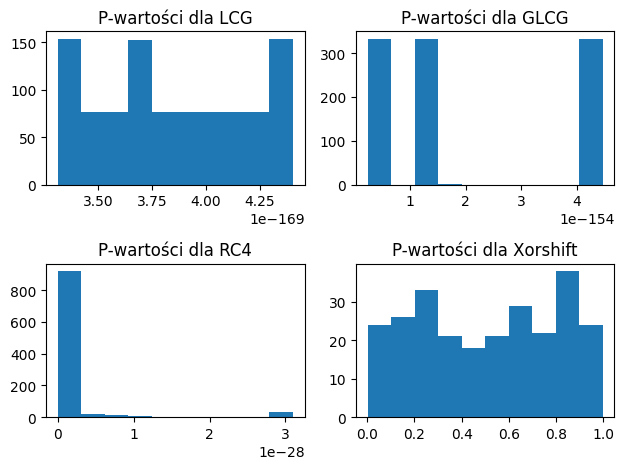

In [45]:
start_time = time.time()

def second_level_testing_ks(data, sequence_length):
    seq_num = len(data) // sequence_length  # ilość podciągów podanej długości
    p_values = []
    for i in range(seq_num):
        seq = data[i * sequence_length : (i + 1) * sequence_length]  # tworzenie podciągów
        try:
            p_value = ks_1samp(seq, uniform.cdf)[1]  # przeprowadzanie testu
            p_values.append(p_value)
        except ValueError:
            p_values.append(None)
    return p_values



length1 = 2**15
length2 = 2**10
p_values2_lcg = second_level_testing_ks(sec_test_lcg, length1)
p_values2_glcg = second_level_testing_ks(sec_test_glcg, length1)
p_values2_rc4 = second_level_testing_ks(sec_test_rc4, length1)
p_values2_xorshift = second_level_testing_ks(sec_test_xorshift, length2)

print("LCG:")
print(sec_level_test_p_val(p_values2_lcg))
print("GLCG:")
print(sec_level_test_p_val(p_values2_glcg))
print("RC4:")
print(sec_level_test_p_val(p_values2_rc4))
print("Xorshift:")
print(sec_level_test_p_val(p_values2_xorshift))

plt.subplot(2, 2, 1)
plt.hist(p_values2_lcg)
plt.title("P-wartości dla LCG")

plt.subplot(2, 2, 2)
plt.hist(p_values2_glcg)
plt.title("P-wartości dla GLCG")

plt.subplot(2, 2, 3)
plt.hist(p_values2_rc4)
plt.title("P-wartości dla RC4")

plt.subplot(2, 2, 4)
plt.hist(p_values2_xorshift)
plt.title("P-wartości dla Xorshift")

plt.tight_layout()

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

In [59]:
start_time = time.time()

binss=20

obs1, edges = np.histogram(p_values2_lcg, bins=binss)
expt1 = np.full(binss, len(p_values2_lcg) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla p-wartości z LCG (second level testing, Kołmogorow-Smirnow):", st1)
print("Ostateczna p-wartość dla LCG:", p1)
print(p_val_test(p1))

obs2, edges = np.histogram(p_values2_glcg, bins=binss)
expt2 = np.full(binss, len(p_values2_glcg) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla p-wartości z GLCG (second level testing, Kołmogorow-Smirnow):", st2)
print("Ostateczna p-wartość dla GLCG:", p2)
print(p_val_test(p2))

obs3, edges = np.histogram(p_values2_rc4, bins=binss)
expt3 = np.full(binss, len(p_values2_rc4) / binss)
st3, p3 = chisquare(f_obs=obs3, f_exp=expt3)
print("Statystyka chi-kwadrat dla p-wartości z RC4 (second level testing, Kołmogorow-Smirnow):", st3)
print("Ostateczna p-wartość dla RC4:", p3)
print(p_val_test(p3))

obs4, edges = np.histogram(p_values2_xorshift, bins=binss)
expt4 = np.full(binss, len(p_values2_xorshift) / binss)
st4, p4 = chisquare(f_obs=obs4, f_exp=expt4)
print("Statystyka chi-kwadrat dla p-wartości z Xorshift (second level testing, Kołmogorow-Smirnow):", st4)
print("Ostateczna p-wartość dla Xorshift:", p4)
print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka chi-kwadrat dla p-wartości z LCG (second level testing, Kołmogorow-Smirnow): 538.48
Ostateczna p-wartość dla LCG: 4.613230844223647e-102
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z GLCG (second level testing, Kołmogorow-Smirnow): 5653.36
Ostateczna p-wartość dla GLCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z RC4 (second level testing, Kołmogorow-Smirnow): 15024.16
Ostateczna p-wartość dla RC4: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z Xorshift (second level testing, Kołmogorow-Smirnow): 26.65625
Ostateczna p-wartość dla Xorshift: 0.1129183134102353
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 0.017514 sekund


## 3.3 Test serii

LCG:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
GLCG:
Hipotezę odrzucono 1000 razy. Hipotezy nie odrzucono 0 razy.
None
RC4:
Hipotezę odrzucono 63 razy. Hipotezy nie odrzucono 937 razy.
None
Xorshift:
Hipotezę odrzucono 13 razy. Hipotezy nie odrzucono 243 razy.
None
Czas wykonania: 42.144408 sekund


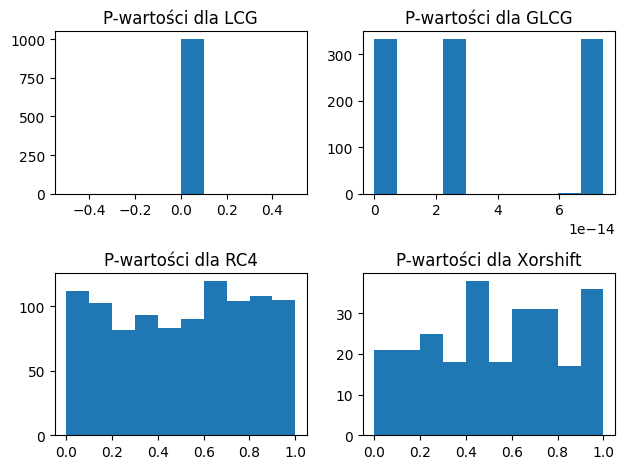

In [46]:
start_time = time.time()

def second_level_testing_runs_test(data, sequence_length):
    seq_num = len(data) // sequence_length  # ilość podciągów podanej długości
    p_values = []
    for i in range(seq_num):
        seq = data[i * sequence_length : (i + 1) * sequence_length]  # tworzenie podciągów
        try:
            p_value = runs_test(seq)["P-wartość"]  # przeprowadzanie testu
            p_values.append(p_value)
        except ValueError:
            p_values.append(None)
    return p_values


length1 = 2**15
length2 = 2**10
p_values3_lcg = second_level_testing_runs_test(sec_test_lcg, length1)
p_values3_glcg = second_level_testing_runs_test(sec_test_glcg, length1)
p_values3_rc4 = second_level_testing_runs_test(sec_test_rc4, length1)
p_values3_xorshift = second_level_testing_runs_test(sec_test_xorshift, length2)

print("LCG:")
print(sec_level_test_p_val(p_values3_lcg))
print("GLCG:")
print(sec_level_test_p_val(p_values3_glcg))
print("RC4:")
print(sec_level_test_p_val(p_values3_rc4))
print("Xorshift:")
print(sec_level_test_p_val(p_values3_xorshift))

plt.subplot(2, 2, 1)
plt.hist(p_values3_lcg)
plt.title("P-wartości dla LCG")

plt.subplot(2, 2, 2)
plt.hist(p_values3_glcg)
plt.title("P-wartości dla GLCG")

plt.subplot(2, 2, 3)
plt.hist(p_values3_rc4)
plt.title("P-wartości dla RC4")

plt.subplot(2, 2, 4)
plt.hist(p_values3_xorshift)
plt.title("P-wartości dla Xorshift")

plt.tight_layout()

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

In [60]:
start_time = time.time()

binss=20

obs1, edges = np.histogram(p_values3_lcg, bins=binss)
expt1 = np.full(binss, len(p_values3_lcg) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla p-wartości z LCG (second level testing, test serii):", st1)
print("Ostateczna p-wartość dla LCG:", p1)
print(p_val_test(p1))

obs2, edges = np.histogram(p_values3_glcg, bins=binss)
expt2 = np.full(binss, len(p_values3_glcg) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla p-wartości z GLCG (second level testing, test serii):", st2)
print("Ostateczna p-wartość dla GLCG:", p2)
print(p_val_test(p2))

obs3, edges = np.histogram(p_values3_rc4, bins=binss)
expt3 = np.full(binss, len(p_values3_rc4) / binss)
st3, p3 = chisquare(f_obs=obs3, f_exp=expt3)
print("Statystyka chi-kwadrat dla p-wartości z RC4 (second level testing, test serii):", st3)
print("Ostateczna p-wartość dla RC4:", p3)
print(p_val_test(p3))

obs4, edges = np.histogram(p_values3_xorshift, bins=binss)
expt4 = np.full(binss, len(p_values3_xorshift) / binss)
st4, p4 = chisquare(f_obs=obs4, f_exp=expt4)
print("Statystyka chi-kwadrat dla p-wartości z Xorshift (second level testing, test serii):", st4)
print("Ostateczna p-wartość dla Xorshift:", p4)
print(p_val_test(p4))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka chi-kwadrat dla p-wartości z LCG (second level testing, test serii): 19000.0
Ostateczna p-wartość dla LCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z GLCG (second level testing, test serii): 5653.36
Ostateczna p-wartość dla GLCG: 0.0
Hipoteza zerowa odrzucona.
None
Statystyka chi-kwadrat dla p-wartości z RC4 (second level testing, test serii): 29.319999999999997
Ostateczna p-wartość dla RC4: 0.0611155137392468
Hipoteza zerowa nieodrzucona.
None
Statystyka chi-kwadrat dla p-wartości z Xorshift (second level testing, test serii): 51.187499999999986
Ostateczna p-wartość dla Xorshift: 8.746086014782819e-05
Hipoteza zerowa odrzucona.
None
Czas wykonania: 0.018461 sekund


# 4. Frequency monobit test

In [20]:
import numpy as np
from scipy.stats import norm
import requests
import time
import matplotlib.pyplot as plt

start_time = time.time()

def freq_monobit(data): # czasy dodać
  seq = 2 * np.array(data) - 1
  S_obs = sum(seq) / np.sqrt(len(seq))
  p_value = 2*(1- norm.cdf(abs(S_obs)))
  return {
        "Statystyka": S_obs,
        "P-wartość": p_value
    }

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Czas wykonania: 0.000215 sekund


## 4.1 Liczba $\pi$

In [21]:
start_time = time.time()

url_pi = "http://www.math.uni.wroc.pl/~rolski/Zajecia/data.pi"
pi_bin = requests.get(url_pi)
bits_pi = pi_bin.text.split("\n")
pi_list = [bit.strip() for bit in bits_pi]
bits_pi_final = "".join(pi_list)
pi_list_help = list(bits_pi_final)
pi_list_final = [int(bit) for bit in pi_list_help]
#print(pi_list_final[1:10])

fmt_pi = freq_monobit(pi_list_final)
print("Statystyka testu frequency monobit dla liczby pi:", fmt_pi["Statystyka"])
print("P-wartość testu frequency monobit dla liczby pi:", fmt_pi["P-wartość"])
print(p_val_test(fmt_pi["P-wartość"]))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka testu frequency monobit dla liczby pi: -0.5047693581663462
P-wartość testu frequency monobit dla liczby pi: 0.6137208398729661
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 2.351214 sekund


### 4.1.1 Second level testing dla liczby $\pi$

Czas wykonania: 20.655849 sekund


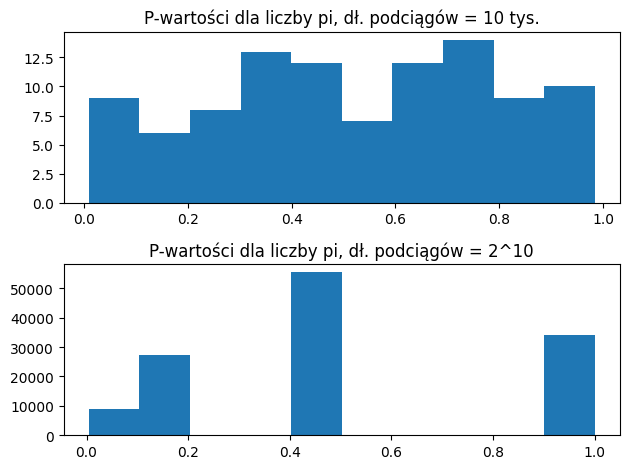

In [28]:
start_time=time.time()

def second_level_testing_freq_monobit(data, sequence_length):
    seq_num = len(data) // sequence_length  # ilość podciągów podanej długości
    p_values = []
    for i in range(seq_num):
        seq = data[i * sequence_length : (i + 1) * sequence_length]  # tworzenie podciągów
        try:
            p_value = freq_monobit(seq)["P-wartość"]  # przeprowadzanie testu
            p_values.append(p_value)
        except ValueError:
            p_values.append(None)
    return p_values


length1 = 10000
length2 = 2^10
p_values_pi1 = second_level_testing_freq_monobit(pi_list_final, length1)
p_values_pi2 = second_level_testing_freq_monobit(pi_list_final, length2)

plt.subplot(2, 1, 1)
plt.hist(p_values_pi1)
plt.title("P-wartości dla liczby pi, długość podciągów = 10 tys.")

plt.subplot(2, 1, 2)
plt.hist(p_values_pi2)
plt.title("P-wartości dla liczby pi, długość podciągów = 2^10")

plt.tight_layout()

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

In [61]:
start_time = time.time()

binss=20

obs1, edges = np.histogram(p_values_pi1, bins=binss)
expt1 = np.full(binss, len(p_values_pi1) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla p-wartości dla liczby pi (second level testing, długość podciągów: 10 tys.):", st1)
print("Ostateczna p-wartość dla liczby pi (długość podciągów: 10 tys.):", p1)
print(p_val_test(p1))

obs2, edges = np.histogram(p_values_pi2, bins=binss)
expt2 = np.full(binss, len(p_values_pi2) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla p-wartości dla liczby pi (second level testing, długość podciągów: 2^10):", st2)
print("Ostateczna p-wartość dla liczby pi (długość podciągów: 2^10):", p2)
print(p_val_test(p2))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka chi-kwadrat dla p-wartości dla liczby pi (second level testing, długość podciągów: 10 tys.): 21.6
Ostateczna p-wartość dla liczby pi (długość podciągów: 10 tys.): 0.30461334759819014
Hipoteza zerowa nieodrzucona.
None
Statystyka chi-kwadrat dla p-wartości dla liczby pi (second level testing, długość podciągów: 2^10): 679289.4242496616
Ostateczna p-wartość dla liczby pi (długość podciągów: 2^10): 0.0
Hipoteza zerowa odrzucona.
None
Czas wykonania: 0.039565 sekund


## 4.2 Liczba $e$

In [30]:
start_time = time.time()

url_e = "http://www.math.uni.wroc.pl/~rolski/Zajecia/data.e"
e_bin = requests.get(url_e)
bits_e = e_bin.text.split("\n")
e_list = [bit.strip() for bit in bits_e]
bits_e_final = "".join(e_list)
e_list_help = list(bits_e_final)
e_list_final = [int(bit) for bit in e_list_help]
#print(e_list_final[1:10])

fmt_e = freq_monobit(e_list_final)
print("Statystyka testu frequency monobit dla liczby e:", fmt_e["Statystyka"])
print("P-wartość testu frequency monobit dla liczby e:", fmt_e["P-wartość"])
print(p_val_test(fmt_e["P-wartość"]))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka testu frequency monobit dla liczby e: 0.09177624693933566
P-wartość testu frequency monobit dla liczby e: 0.926875816594998
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 3.410594 sekund


### 4.2.1 Second level testing dla liczby $e$

Czas wykonania: 21.142259 sekund


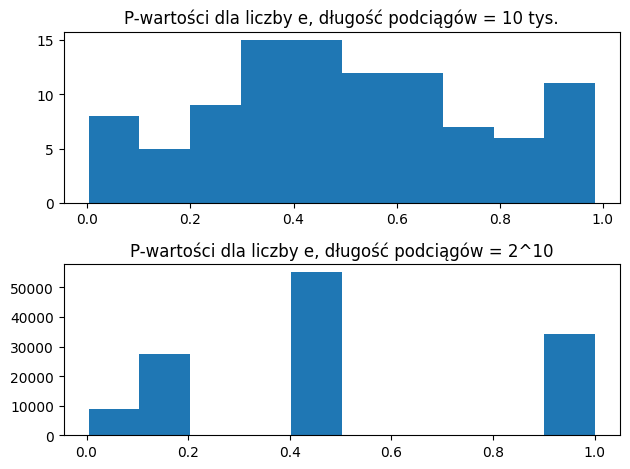

In [31]:
start_time = time.time()

length1 = 10000
length2 = 2^10
p_values_e1 = second_level_testing_freq_monobit(e_list_final, length1)
p_values_e2 = second_level_testing_freq_monobit(e_list_final, length2)

plt.subplot(2, 1, 1)
plt.hist(p_values_e1)
plt.title("P-wartości dla liczby e, długość podciągów = 10 tys.")

plt.subplot(2, 1, 2)
plt.hist(p_values_e2)
plt.title("P-wartości dla liczby e, długość podciągów = 2^10")

plt.tight_layout()

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

In [63]:
start_time = time.time()

binss=20

obs1, edges = np.histogram(p_values_e1, bins=binss)
expt1 = np.full(binss, len(p_values_e1) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla p-wartości dla liczby e (second level testing, długość podciągów: 10 tys.):", st1)
print("Ostateczna p-wartość dla liczby e (długość podciągów: 10 tys.):", p1)
print(p_val_test(p1))

obs2, edges = np.histogram(p_values_e2, bins=binss)
expt2 = np.full(binss, len(p_values_e2) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla p-wartości dla liczby e (second level testing, długość podciągów: 2^10):", st2)
print("Ostateczna p-wartość dla liczby e (długość podciągów: 2^10):", p2)
print(p_val_test(p2))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka chi-kwadrat dla p-wartości dla liczby e (second level testing, długość podciągów: 10 tys.): 23.2
Ostateczna p-wartość dla liczby e (długość podciągów: 10 tys.): 0.2286475195552709
Hipoteza zerowa nieodrzucona.
None
Statystyka chi-kwadrat dla p-wartości dla liczby e (second level testing, długość podciągów: 2^10): 676618.5897619617
Ostateczna p-wartość dla liczby e (długość podciągów: 2^10): 0.0
Hipoteza zerowa odrzucona.
None
Czas wykonania: 0.096593 sekund


## 4.3 Liczba $\sqrt2$

In [32]:
start_time = time.time()

url_s2 = "http://www.math.uni.wroc.pl/~rolski/Zajecia/data.sqrt2"
s2_bin = requests.get(url_s2)
bits_s2 = s2_bin.text.split("\n")
s2_list = [bit.strip() for bit in bits_s2]
bits_s2_final = "".join(s2_list)
s2_list_help = list(bits_s2_final)
s2_list_final = [int(bit) for bit in s2_list_help]
#print(s2_list_final[1:10])

fmt_s2 = freq_monobit(s2_list_final)
print("Statystyka testu frequency monobit dla pierwiastka z dwóch:", fmt_s2["Statystyka"])
print("P-wartość testu frequency monobit dla pierwiastka z dwóch:", fmt_s2["P-wartość"])
print(p_val_test(fmt_s2["P-wartość"]))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka testu frequency monobit dla pierwiastka z dwóch: -0.23043807059061344
P-wartość testu frequency monobit dla pierwiastka z dwóch: 0.8177513809816284
Hipoteza zerowa nieodrzucona.
None
Czas wykonania: 2.605919 sekund


### 4.3.1 Second level testing dla liczby $\sqrt2$

Czas wykonania: 20.741177 sekund


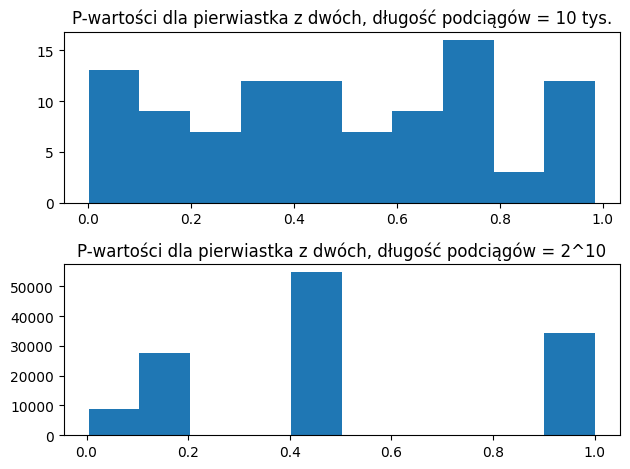

In [33]:
start_time = time.time()

length1 = 10000
length2 = 2^10
p_values_s2_1 = second_level_testing_freq_monobit(s2_list_final, length1)
p_values_s2_2 = second_level_testing_freq_monobit(s2_list_final, length2)

plt.subplot(2, 1, 1)
plt.hist(p_values_s2_1)
plt.title("P-wartości dla pierwiastka z dwóch, długość podciągów = 10 tys.")

plt.subplot(2, 1, 2)
plt.hist(p_values_s2_2)
plt.title("P-wartości dla pierwiastka z dwóch, długość podciągów = 2^10")

plt.tight_layout()

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

In [64]:
start_time = time.time()

binss=20

obs1, edges = np.histogram(p_values_s2_1, bins=binss)
expt1 = np.full(binss, len(p_values_s2_1) / binss)
st1, p1 = chisquare(f_obs=obs1, f_exp=expt1)
print("Statystyka chi-kwadrat dla p-wartości dla pierwiastka z dwóch (second level testing, długość podciągów: 10 tys.):", st1)
print("Ostateczna p-wartość dla pierwiastka z dwóch (długość podciągów: 10 tys.):", p1)
print(p_val_test(p1))

obs2, edges = np.histogram(p_values_s2_2, bins=binss)
expt2 = np.full(binss, len(p_values_s2_2) / binss)
st2, p2 = chisquare(f_obs=obs2, f_exp=expt2)
print("Statystyka chi-kwadrat dla p-wartości dla pierwiastka z dwóch (second level testing, długość podciągów: 2^10):", st2)
print("Ostateczna p-wartość dla pierwiastka z dwóch (długość podciągów: 2^10):", p2)
print(p_val_test(p2))

end_time = time.time()

execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Statystyka chi-kwadrat dla p-wartości dla pierwiastka z dwóch (second level testing, długość podciągów: 10 tys.): 27.2
Ostateczna p-wartość dla pierwiastka z dwóch (długość podciągów: 10 tys.): 0.10008010890453899
Hipoteza zerowa nieodrzucona.
None
Statystyka chi-kwadrat dla p-wartości dla pierwiastka z dwóch (second level testing, długość podciągów: 2^10): 672255.3575352281
Ostateczna p-wartość dla pierwiastka z dwóch (długość podciągów: 2^10): 0.0
Hipoteza zerowa odrzucona.
None
Czas wykonania: 0.035947 sekund
